In [75]:
import numpy as np
import math 
import matplotlib.pyplot as plt
%matplotlib notebook

# Ларичева Мария БПМ-161
## Лабораторная работа 5. Вариант 12

### **Задача 5.1**

Функция $y=f(x)$ задана таблицей значений $y_0, y_1, ..., y_n$ в точках $x_0, x_1, ..., x_n$. Используя метод
наименьших квадратов (МНК), найти многочлен $P_m = a_0 + a_1x + ... + a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$.  За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина $\sigma_m=\sqrt{\frac{1}{n-m}\sum\limits_{k=0}^n(P_m(x_k)-y_k)^2}$ стабилизируется
или начинает возрастать.

Зададим векторы исходных данных $x$ и $y$

In [2]:
x = np.linspace(-1.0, 2.0, num=13)
print("x =\n", x)
y = np.array([0.192, -0.054, -0.209, -0.429, -0.413, -0.491, -0.357, -0.434, -0.140, -0.130, 0.142, 0.288, 0.876])
print("y =\n", y)

x =
 [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75
  2.  ]
y =
 [ 0.192 -0.054 -0.209 -0.429 -0.413 -0.491 -0.357 -0.434 -0.14  -0.13
  0.142  0.288  0.876]


In [3]:
n = len(x)
def min_sqr(x,y,n,m):
    m = m+1
    A = np.empty([m, m])
    b = np.empty(m)
    for j in range(0,m):
        b[j] = sum([y[i]*np.power(x[i],j) for i in range(n)])
        for k in range(0,m):
            A[j][k] = sum([np.power(x[i],k+j) for i in range(n)])
    a = np.linalg.solve(A, b)
    print(a)
    return a

In [4]:
a0 = min_sqr(x,y,n,0)
a1 = min_sqr(x,y,n,1)

[-0.08915385]
[-0.18495604  0.1916044 ]


Посчитаем значение $\sigma_m$ для каждого из многочленов $P_m$ и построим диаграмму

In [5]:
def p_m(a,t):
    return sum([a[j]*(t**j) for j in range(len(a)-1)])
def otkl(a):
    return math.sqrt(1/(n-(len(a)-1))*sum([ np.power((p_m(a,x[k]) - y[k]),2) for k in range (n)]))

In [6]:
lst_m = [i for i in range(13)]
lst_sigm = [otkl(min_sqr(x,y,n,i)) for i in lst_m]
#print(lst_sigm)

[-0.08915385]
[-0.18495604  0.1916044 ]
[-0.44111988 -0.21825774  0.40986214]
[-0.43026499 -0.23169714  0.38505095  0.01654079]
[-0.42515267 -0.11333932  0.33609667 -0.12226628  0.06940354]
[-0.46284595 -0.13808157  0.59318415 -0.14932812 -0.14709118  0.08659789]
[-0.45252551 -0.2121385   0.51278902  0.1008642  -0.12540785 -0.08953751
  0.0587118 ]
[-0.44104015 -0.13361731  0.33784237 -0.17319819  0.31688667  0.02103612
 -0.22877964  0.08214041]
[-0.45701599 -0.10682376  0.61670775 -0.43149177 -0.33192745  0.6617098
  0.0457948  -0.33625873  0.10459979]
[-0.4580273  -0.07052675  0.62746404 -0.71536146 -0.24661764  1.19018911
 -0.29076991 -0.56300956  0.34678391 -0.05381869]
[-0.43366335  0.08019973 -0.2136573  -1.83345637  4.37399667  1.87303283
 -8.09034702  2.54875588  3.79195277 -2.86922551  0.56308136]
[ -0.4579968    0.16370195   0.75977012  -3.58811372  -0.7823194
  11.21301283  -2.21585801 -13.62365065   7.14704369   4.73563932
  -4.44718346   0.91095731]
[  -0.41299181   -0.894

Так как с номера 8 значение $\sigma_m$ много превышает предудыщие значения, отбросим последующие значения

<BarContainer object of 8 artists>

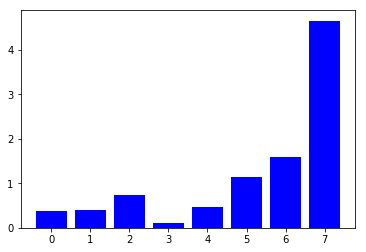

In [7]:
plt.bar(lst_m[:8], lst_sigm[:8], color="blue")

Величина возрастает с четвертого значения, как видно из графика выше

[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774

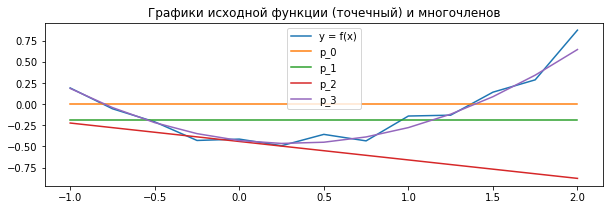

In [8]:
f = plt.figure(figsize = (10,3))
plt.title("Графики исходной функции (точечный) и многочленов")
plt.plot(x, y, label='y = f(x)')
for i in range(4):
    plt.plot(x, [p_m(min_sqr(x,y,n,i),x[j]) for j in range(len(x))], label = 'p_%i'%i)
plt.legend(loc='best')

Используем QR-разложение

In [9]:
from scipy.linalg import qr
from scipy.linalg import solve_triangular
from numpy.linalg import inv

Представим $A$ в виде $A = QR$. Тогда нужно найти решение для $Rx = Q^Tb$

In [10]:
def min_sqr2(x,y,n,m):
    m = m+1
    A = np.empty([m, m])
    for j in range(0,m):
        for k in range(0,m):
            A[j][k] = sum([np.power(x[i],k+j) for i in range(n)])
    Q,R = qr(A)
    y_new = Q.transpose()@y[:m]
    a = solve_triangular(R, y_new)
    print(a)
    return a

In [11]:
a0 = min_sqr2(x,y,n,0)
a1 = min_sqr2(x,y,n,1)

[0.01476923]
[ 0.02136264 -0.01318681]


In [12]:
lst_m = [i for i in range(13)]
lst_sigm = [otkl(min_sqr2(x,y,n,i)) for i in lst_m]

[0.01476923]
[ 0.02136264 -0.01318681]
[ 0.04334066  0.02197802 -0.03516484]
[ 0.05043856  0.01319014 -0.05138861  0.01081585]
[ 0.0628542   0.30063109 -0.1702778  -0.32628767  0.16855176]
[ 0.06612927  0.30278088 -0.19261546 -0.32393634  0.18736242 -0.00752426]
[-0.02620729  0.9653657   0.52667707 -2.56239857 -0.00663764  1.56835315
 -0.52529247]
[-0.09737607  0.47881113  1.61072956 -0.86417782 -2.74730451  0.88318643
  1.256141   -0.50898099]
[ -0.68069347   1.45710992  11.79279368 -10.29511483 -26.43711136
  24.27576613  11.2815323  -15.78576773   3.81919669]
[ -0.76304617   4.41283125  12.66869529 -33.41105884 -19.49020328
  67.3106457  -16.12544752 -34.25043491  23.54062131  -4.38253881]
[  -1.67210428   -1.2110158    44.05228367    8.30685797 -191.89274464
   41.8326497   274.88930128 -150.3554012  -105.00416196  100.66481121
  -21.00947002]
[  -12.12020277    34.6424106    462.01467695  -745.09281035
 -2405.87008144  4052.1547322   2797.23077668 -7094.3288323
  1335.5755183   33

<BarContainer object of 8 artists>

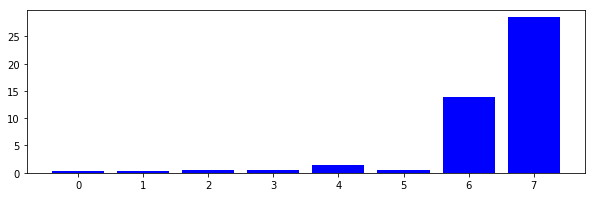

In [13]:
f2 = plt.figure(figsize = (10,3))
plt.bar(lst_m[:8], lst_sigm[:8], color="blue")

[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.08915385]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.18495604  0.1916044 ]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774  0.40986214]
[-0.44111988 -0.21825774

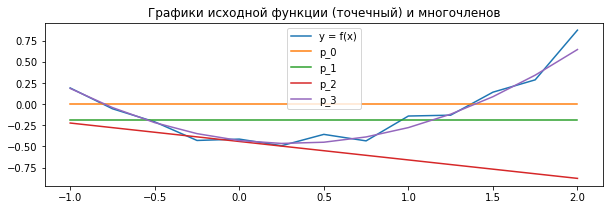

In [14]:
f3 = plt.figure(figsize = (10,3))
plt.title("Графики исходной функции (точечный) и многочленов")
plt.plot(x, y, label='y = f(x)')
for i in range(4):
    plt.plot(x, [p_m(min_sqr(x,y,n,i),x[j]) for j in range(len(x))], label = 'p_%i'%i)
plt.legend(loc='best')

### **Задача 5.3**

Зависимость между величинами $x$ и $y$ описывается функцией $y=f(x,a,b)$, где $a$ и $b$ – неизвестные параметры. Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов.

$y = ae^{b|x|}$

In [15]:
x = np.linspace(-1.5, 1.5, num=11)
print("x =\n", x)
y = np.array([0.0829, 0.2192, 0.5794, 1.5315, 4.0481, 10.7, 4.0481, 1.5315, 0.5794, 0.2192, 0.0829])
print("y =\n", y)

x =
 [-1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9  1.2  1.5]
y =
 [ 0.0829  0.2192  0.5794  1.5315  4.0481 10.7     4.0481  1.5315  0.5794
  0.2192  0.0829]


Сделаем замену $s = ln(y)$, $t = |x|$. Получим $s = ln(a) + bt$

In [16]:
s = [math.log(i) for i in y]
s = np.array(s)
t = [abs(i) for i in x]
t = np.array(t)

In [17]:
coef = min_sqr(t,s,len(x),1)

[ 2.3703411  -3.24020268]


Вместо $a$ получили $ln(a)$. Вернемся обратно

In [18]:
coef[0] = math.exp((coef[0]))

In [19]:
print("a = ", coef[0], "\nb = ", coef[1])

a =  10.701041821804608 
b =  -3.2402026775598265


### **Задача 5.7**

Дана кусочно-гладкая функция $y=f(x)$. Сравнить качество приближения функции кусочно-линейной и
глобальной интерполяциями

$y = |cos(x)|$

Вычислим значения функции в произвольных точках $x_i$, i=0,1,..., k-1, отрезка $[0,\pi]$, по которым будет осуществляться интерполяция функции

In [20]:
k = 20
x = np.linspace(0, math.pi, num=k)
print(x)

[0.         0.16534698 0.33069396 0.49604095 0.66138793 0.82673491
 0.99208189 1.15742887 1.32277585 1.48812284 1.65346982 1.8188168
 1.98416378 2.14951076 2.31485774 2.48020473 2.64555171 2.81089869
 2.97624567 3.14159265]


In [21]:
def y_func(x):
    return abs(math.cos(x))

In [22]:
y = [y_func(i) for i in x]
print(y)

[1.0, 0.9863613034027223, 0.9458172417006346, 0.8794737512064891, 0.7891405093963937, 0.6772815716257411, 0.546948158122427, 0.40169542465296953, 0.24548548714079924, 0.0825793454723324, 0.08257934547233228, 0.24548548714079912, 0.40169542465296926, 0.5469481581224267, 0.6772815716257409, 0.7891405093963935, 0.879473751206489, 0.9458172417006346, 0.9863613034027223, 1.0]


Составим функцию, возвращающую линейную функцию по двум точкам (интерполятор первого порядка) 

In [44]:
def lin_interpolator(x1,y1,x2,y2,x):
    return (x*(y2 - y1)/(x2-x1)+ x1*(y2-y1)/(x2-x1) + y1)

Вычислим приближенные значения в $3k$ точках отрезка $[0,\pi]$

In [45]:
x1 = np.linspace(0, math.pi, num=3*k)
print(x1)

[0.         0.05324733 0.10649467 0.159742   0.21298933 0.26623667
 0.319484   0.37273133 0.42597866 0.479226   0.53247333 0.58572066
 0.638968   0.69221533 0.74546266 0.79871    0.85195733 0.90520466
 0.958452   1.01169933 1.06494666 1.118194   1.17144133 1.22468866
 1.27793599 1.33118333 1.38443066 1.43767799 1.49092533 1.54417266
 1.59741999 1.65066733 1.70391466 1.75716199 1.81040933 1.86365666
 1.91690399 1.97015133 2.02339866 2.07664599 2.12989332 2.18314066
 2.23638799 2.28963532 2.34288266 2.39612999 2.44937732 2.50262466
 2.55587199 2.60911932 2.66236666 2.71561399 2.76886132 2.82210865
 2.87535599 2.92860332 2.98185065 3.03509799 3.08834532 3.14159265]


In [49]:
y1 = []
for i in range (3*k):
    z = -1
    for j in range(k):
        if (x1[i]>x[j] and x1[i]<x[j+1]):
            z = j
            break
    y1.append(lin_interpolator(x[z], y[z], x[z+1], y[z+1], x1[i]))

In [50]:
print(y1)

[1.0, 0.9956078773669784, 0.9912157547339567, 0.9868236321009352, 0.8935909927284539, 0.8805344304854087, 0.8674778682423635, 0.6635762906153713, 0.6422114377443753, 0.6208465848733792, 0.31757036570979413, 0.2884799997031532, 0.25938963369651236, -0.12658604896335524, -0.16260841875390453, -0.1986307885444536, -0.6459339315689229, -0.6879057087988035, -0.7298774860286842, -1.2133180186684558, -1.2600943226670949, -1.3068706266657335, -1.7984818308150559, -1.8487867259460933, -1.8990916210771316, -2.3692961426903545, -2.4217574425496915, -2.474218742409028, 0.0825793454723304, 0.08257934547233035, 0.08257934547233033, 0.08257934547233028, 3.390402357655777, 3.4428636575151135, 3.495324957374451, 3.7244661293609997, 3.774771024492037, 3.8250759196230755, 3.9222277782347343, 3.9690040822333725, 4.015780386232011, 3.962125400090624, 4.004097177320506, 4.046068954550386, 3.8282909711990385, 3.864313340989588, 3.900335710780137, 3.511386338859949, 3.54047670486659, 3.56956707087323, 3.00921

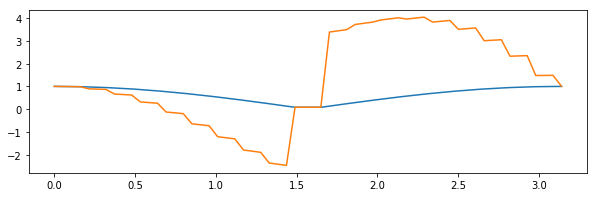

In [51]:
f4 = plt.figure(figsize = (10,3))
plt.plot(x,y)
plt.plot(x1,y1)

Составим интерполяционный многочлен Ньютона

In [52]:
def coef(x, y):
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a)

def Newton(a, x, r):
    n = len(a) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp 

In [53]:
x = np.array(x)
y = np.array(y)
y3 = Newton(coef(x,y),x,x1)
print(len(y3))

60


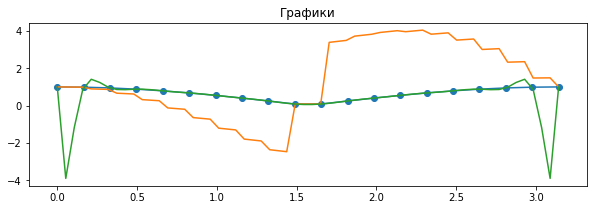

In [54]:
f5 = plt.figure(figsize = (10,3))
plt.title("Графики")
plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x1,y3)
plt.scatter(x, y)

In [55]:
er1 = [y_func(x1[i]) - y1[i] for i in range(3*k)]
er3 = [y_func(x1[i]) - y3[i] for i in range(3*k)]

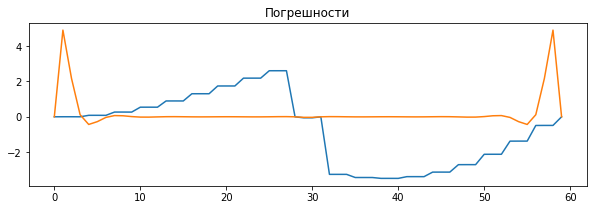

In [56]:
f6 = plt.figure(figsize = (10,3))
plt.title("Погрешности")
plt.plot(range(3*k),er1)
plt.plot(range(3*k),er3)

### **Задача 5.8**

Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и чебышевском распределениях узлов интерполяции. Сравнить качество приближения.

$y = e^{-x^2}$, отрезок $[-1,1]$

In [57]:
k = 20
x = np.linspace(-1, 1, num=k)
print(x)

[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


In [58]:
def y_func(x):
    return math.exp(-x**2)

In [59]:
y = [y_func(i) for i in x]
print(y)

[0.36787944117144233, 0.44908009734755805, 0.5361889303292545, 0.6261633218904425, 0.7152092974610132, 0.7990140640530015, 0.873074776630392, 0.9330914390145758, 0.9753774566047819, 0.9972337500375152, 0.9972337500375152, 0.9753774566047819, 0.9330914390145758, 0.8730747766303921, 0.7990140640530016, 0.7152092974610132, 0.6261633218904427, 0.5361889303292547, 0.44908009734755816, 0.36787944117144233]


In [66]:
X_matrix = []
for i in range(k):
    x_line = []
    for j in range(k):
        x_line.append(x[i]**j)
    X_matrix.append(x_line)
X_matrix = np.array(X_matrix)

In [70]:
a = np.linalg.solve(X_matrix, y)
print("Получившиеся коэффициенты многочлена k-ой степени: \n", a)

Получившиеся коэффициенты многочлена k-ой степени: 
 [ 1.00000000e+00  1.59973087e-16 -1.00000000e+00 -2.27062437e-14
  5.00000000e-01  7.22911677e-13 -1.66666665e-01 -1.02275192e-11
  4.16666482e-02  7.30155889e-11 -8.33321706e-03 -2.87750415e-10
  1.38846312e-03  6.51412750e-10 -1.97484340e-04 -8.39600082e-10
  2.36120478e-05  5.70103989e-10 -1.91566306e-06 -1.57654677e-10]


Посчитаем значения в 3k точках

In [90]:
def calc_global_interpolation(x,a):
    s = 0
    for i in range(k):
        s+=a[i]*(x**i)
    return s

In [72]:
x1 = np.linspace(-1, 1, num=3*k)
print(x1)

[-1.         -0.96610169 -0.93220339 -0.89830508 -0.86440678 -0.83050847
 -0.79661017 -0.76271186 -0.72881356 -0.69491525 -0.66101695 -0.62711864
 -0.59322034 -0.55932203 -0.52542373 -0.49152542 -0.45762712 -0.42372881
 -0.38983051 -0.3559322  -0.3220339  -0.28813559 -0.25423729 -0.22033898
 -0.18644068 -0.15254237 -0.11864407 -0.08474576 -0.05084746 -0.01694915
  0.01694915  0.05084746  0.08474576  0.11864407  0.15254237  0.18644068
  0.22033898  0.25423729  0.28813559  0.3220339   0.3559322   0.38983051
  0.42372881  0.45762712  0.49152542  0.52542373  0.55932203  0.59322034
  0.62711864  0.66101695  0.69491525  0.72881356  0.76271186  0.79661017
  0.83050847  0.86440678  0.89830508  0.93220339  0.96610169  1.        ]


In [91]:
y1 = [calc_global_interpolation(i,a) for i in x1]
print(y1)

[0.36787944117144233, 0.39323318981504973, 0.41936938515215527, 0.4462160508640477, 0.4736914679439123, 0.5017043252466243, 0.5301539928251693, 0.5589309217746116, 0.5879171724117674, 0.6169870705951799, 0.6460079898629728, 0.6748412548707285, 0.7033431593884797, 0.7313660899098519, 0.7587597437844772, 0.7853724287549827, 0.8110524289098444, 0.8356494203990418, 0.8590159188437231, 0.8810087392426792, 0.9014904483707046, 0.9203307892038824, 0.9374080568141945, 0.9526104054623724, 0.9658370672868699, 0.9769994640326801, 0.986022194672186, 0.9928438835182442, 0.9974178754861542, 0.9997127674872522, 0.9997127674872522, 0.9974178754861541, 0.9928438835182442, 0.986022194672186, 0.9769994640326801, 0.9658370672868697, 0.9526104054623724, 0.9374080568141945, 0.9203307892038824, 0.9014904483707044, 0.8810087392426793, 0.859015918843723, 0.8356494203990416, 0.8110524289098445, 0.7853724287549825, 0.7587597437844772, 0.7313660899098516, 0.7033431593884795, 0.6748412548707282, 0.6460079898629726,

<IPython.core.display.Javascript object>


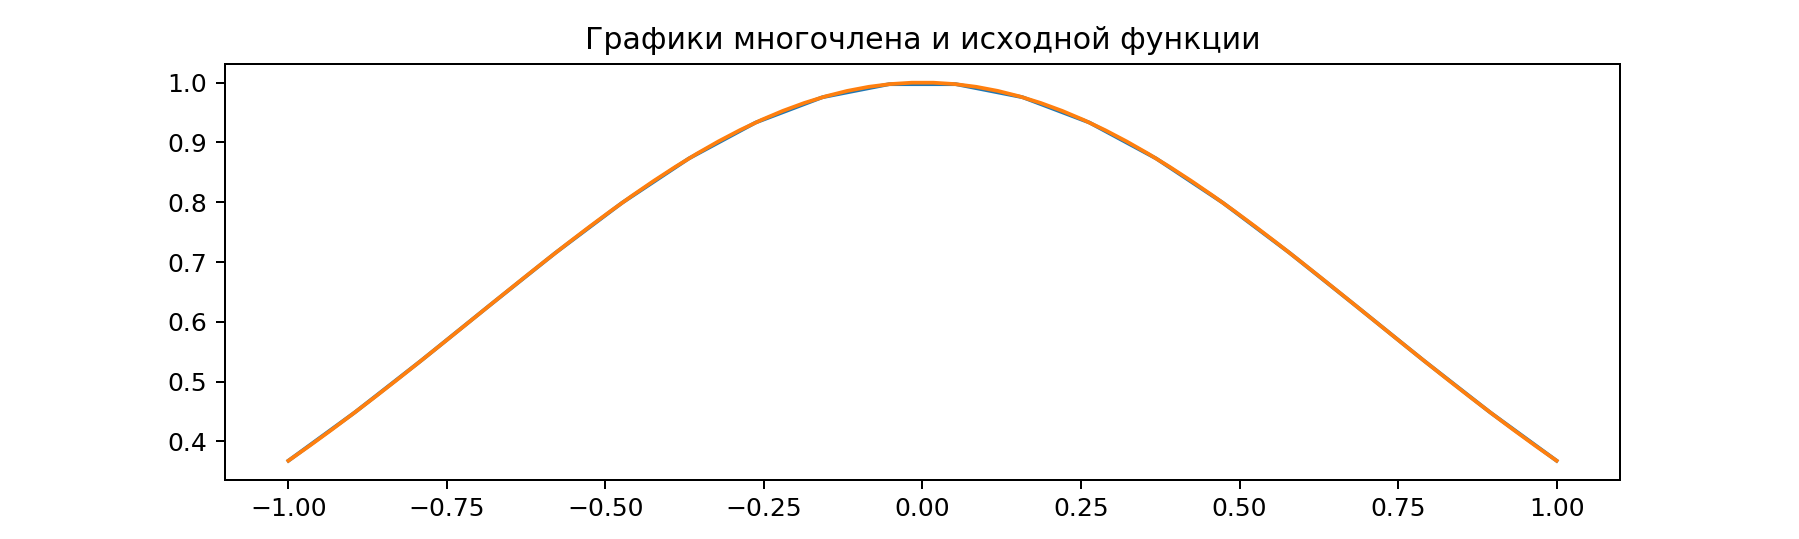

In [92]:
f7 = plt.figure(figsize = (10,3))
plt.title("Графики многочлена и исходной функции")
plt.plot(x,y)
plt.plot(x1,y1)

In [112]:
xc = [math.cos((2*i+1)/(2*k)*math.pi) for i in range(k)]
print(xc)

[0.996917333733128, 0.9723699203976766, 0.9238795325112867, 0.8526401643540923, 0.760405965600031, 0.6494480483301837, 0.5224985647159489, 0.38268343236508984, 0.23344536385590545, 0.078459095727845, -0.07845909572784489, -0.23344536385590514, -0.3826834323650897, -0.5224985647159488, -0.6494480483301835, -0.7604059656000309, -0.8526401643540922, -0.9238795325112867, -0.9723699203976766, -0.996917333733128]


In [113]:
yc = [y_func(i) for i in xc]
print(yc)

[0.37015102894271995, 0.3884840124196476, 0.42589885495222357, 0.4833591838347625, 0.5608974254455905, 0.6558765016244992, 0.761089172347665, 0.8637718483951083, 0.9469615979307076, 0.9938630785985761, 0.9938630785985761, 0.9469615979307078, 0.8637718483951085, 0.7610891723476652, 0.6558765016244993, 0.5608974254455906, 0.48335918383476256, 0.42589885495222357, 0.3884840124196476, 0.37015102894271995]


In [114]:
X_matrix_ch = []
for i in range(k):
    x_line = []
    for j in range(k):
        x_line.append(xc[i]**j)
    X_matrix_ch.append(x_line)
X_matrix_ch = np.array(X_matrix_ch)
ac = np.linalg.solve(X_matrix_ch, yc)

In [115]:
yc1 = [calc_global_interpolation(i,ac) for i in x1]
print(yc1)

[0.36787944117113597, 0.39323318975755445, 0.4193693851282001, 0.44621605086313393, 0.47369146794818834, 0.5017043252488297, 0.5301539928251645, 0.558930921774064, 0.5879171724116212, 0.6169870705954048, 0.6460079898631668, 0.674841254870647, 0.7033431593881843, 0.7313660899095783, 0.7587597437844255, 0.7853724287551881, 0.8110524289101798, 0.8356494203993116, 0.8590159188437797, 0.8810087392424962, 0.9014904483703796, 0.9203307892035782, 0.937408056814057, 0.9526104054624649, 0.9658370672871466, 0.9769994640330136, 0.9860221946724259, 0.9928438835182847, 0.9974178754859783, 0.999712767486938, 0.999712767486938, 0.9974178754859783, 0.9928438835182847, 0.986022194672426, 0.9769994640330136, 0.9658370672871466, 0.9526104054624648, 0.937408056814057, 0.9203307892035782, 0.9014904483703792, 0.8810087392424963, 0.8590159188437796, 0.8356494203993113, 0.8110524289101799, 0.7853724287551883, 0.7587597437844257, 0.7313660899095785, 0.7033431593881845, 0.674841254870647, 0.646007989863167, 0.61

<IPython.core.display.Javascript object>


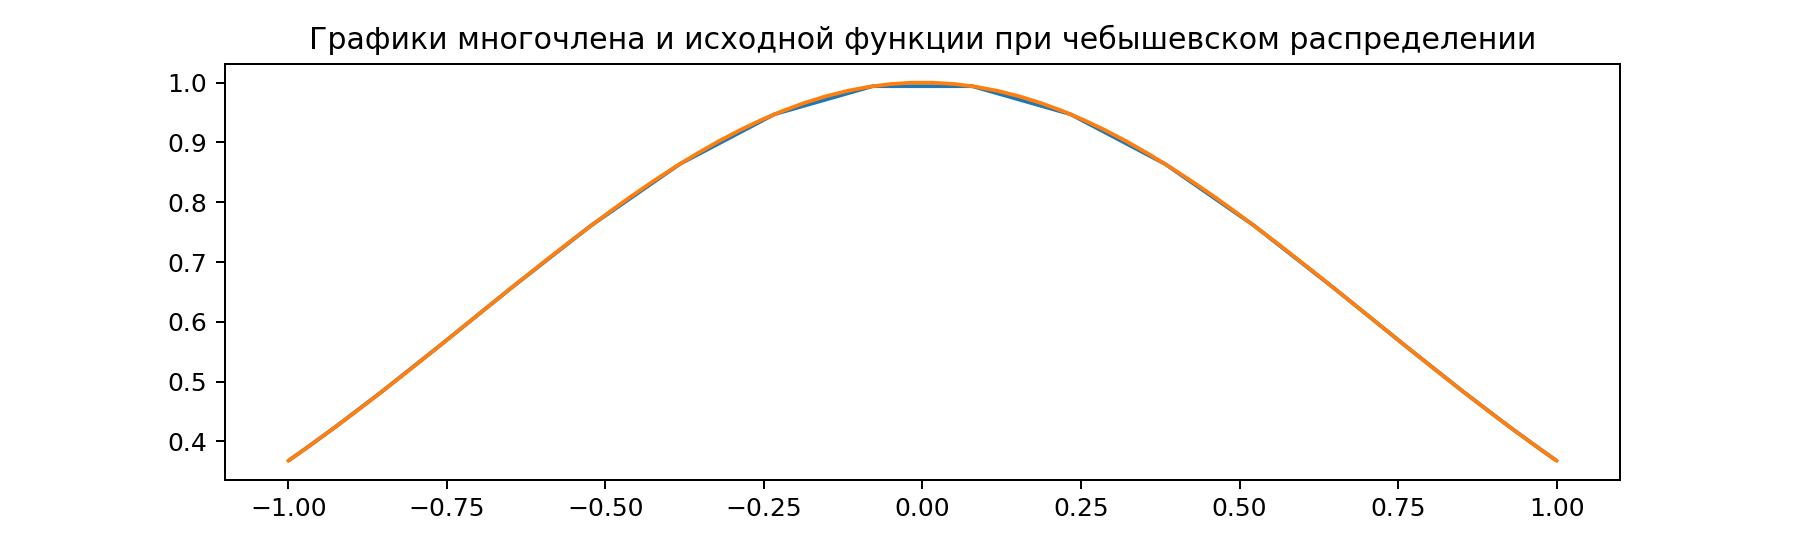

In [116]:
f8 = plt.figure(figsize = (10,3))
plt.title("Графики многочлена и исходной функции при чебышевском распределении")
plt.plot(xc,yc)
plt.plot(x1,yc1)

Посчитаем ошибки

In [123]:
yf = [y_func(i) for i in x1]
er1 = max([abs(yf[i]-y1[i]) for i in range(3*k)])
er2 = max([abs(yf[i]-yc1[i]) for i in range(3*k)])
print(er1)
print(er2)

5.745620645924987e-11
3.3373304120232206e-13


Ошибка при равномерном распределении выше

Построим многочлен по 2k узлам интерполяции

In [130]:
x_new = np.linspace(-1, 1, num=2*k)
y_new = [y_func(i) for i in x_new]
X_matrix_new = []
for i in range(2*k):
    x_line = []
    for j in range(2*k):
        x_line.append(x_new[i]**j)
    X_matrix_new.append(x_line)
X_matrix_new = np.array(X_matrix_new)
a_new = np.linalg.solve(X_matrix_new, y_new)

<IPython.core.display.Javascript object>


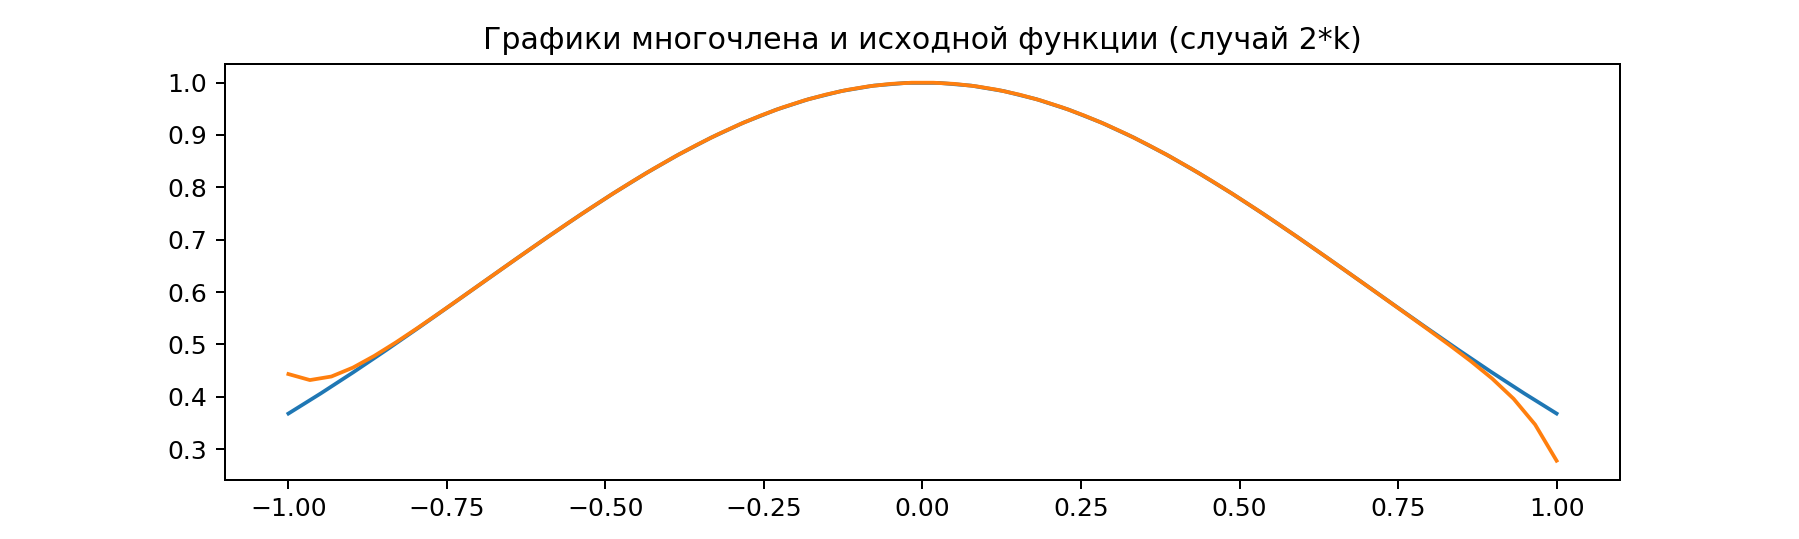

In [132]:
y1_new = [calc_global_interpolation(i,a_new) for i in x1]
f9 = plt.figure(figsize = (10,3))
plt.title("Графики многочлена и исходной функции (случай 2*k)")
plt.plot(x_new,y_new)
plt.plot(x1,y1_new)

In [142]:
xc_new = [math.cos((2*i+1)/(2*k)*math.pi) for i in range(2*k)]
yc_new = [y_func(i) for i in xc_new]
X_matrix_ch_new = []
for i in range(2*k):
    x_line = []
    for j in range(2*k):
        x_line.append(xc_new[i]**j)
    X_matrix_ch_new.append(x_line)
X_matrix_ch_new = np.array(X_matrix_ch_new)
ac_new = np.linalg.lstsq(X_matrix_ch_new, yc_new)[0]
print(ac_new)
yc1_new = [calc_global_interpolation(i,ac_new) for i in x1]


[ 1.00000011e+00 -1.17732971e-07 -1.00002239e+00  2.30398932e-05
  5.00642819e-01 -6.76794155e-04 -1.72797353e-01  6.81943891e-03
  6.42842367e-02 -2.87312010e-02 -2.88346263e-02  4.45873796e-02
 -4.67319241e-02  2.20951280e-02  3.18238769e-02 -1.27857965e-01
  2.25419357e-01  8.33905510e-02 -2.61824417e-01  4.29929314e-02
 -1.13980208e-01 -6.74066929e-02  1.21011314e-01 -4.02984197e-03
  1.52187482e-01  1.50645716e-01 -7.87612145e-02 -9.07664504e-02
  5.17510992e-02 -7.46274791e-02 -1.38864786e-01 -8.34482078e-02
  5.06808018e-02  1.10955358e-01  7.00078242e-02  2.42745978e-02
 -1.16675305e-01  6.53967344e-02  5.85725066e-02 -7.36487514e-02]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


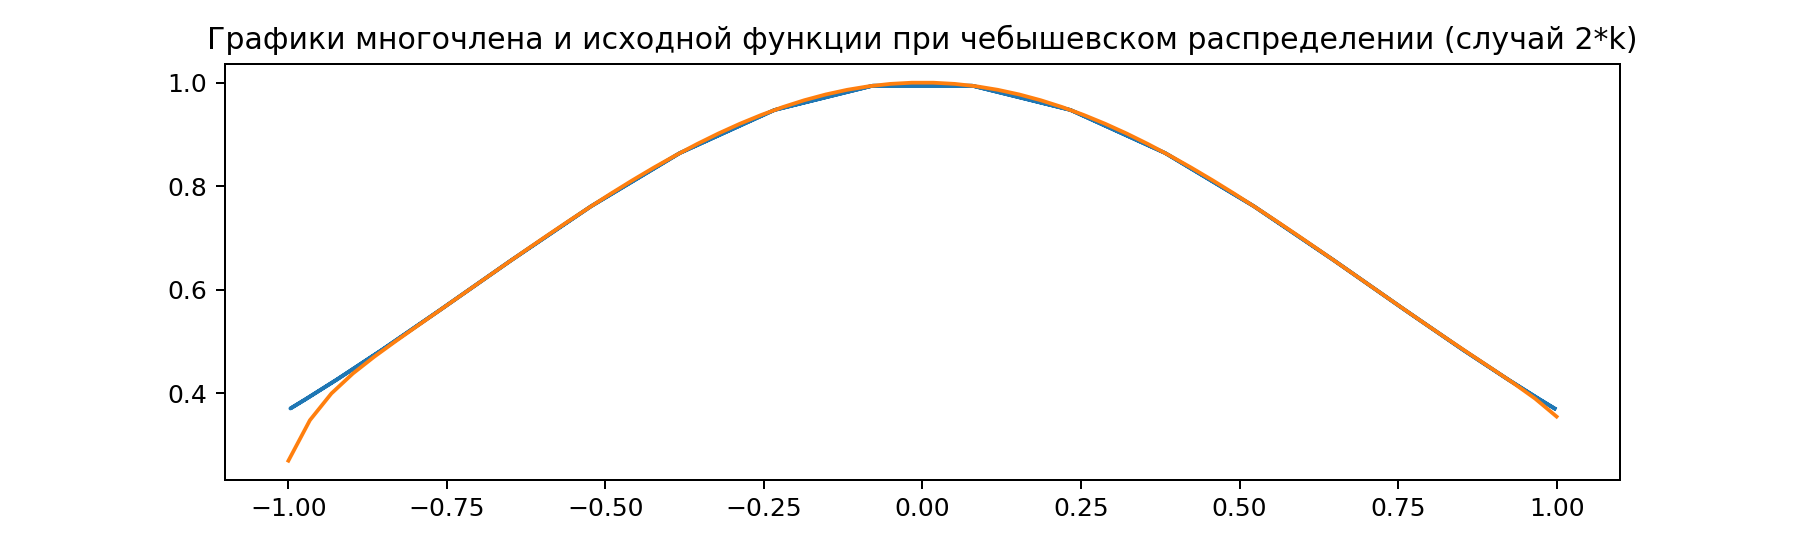

In [143]:
f10 = plt.figure(figsize = (10,3))
plt.title("Графики многочлена и исходной функции при чебышевском распределении (случай 2*k)")
plt.plot(xc_new,yc_new)
plt.plot(x1,yc1_new)

In [144]:
er1 = max([abs(yf[i]-y1_new[i]) for i in range(3*k)])
er2 = max([abs(yf[i]-yc1_new[i]) for i in range(3*k)])
print(er1)
print(er2)

0.09002924555336533
0.09856213684325077


По сравнению с предыдущим случаем ошибка увеличилась (из-за несовпадений в концах отрезка)